In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### The Data

In [4]:
#drop duplicates from the dataset
brfss = pd.read_csv('heart_disease_brfss2019.csv')
brfss = brfss.drop_duplicates(subset=None, keep='first', inplace=False)

In [5]:
brfss.head()

,HeartDisease,Age,Sex,Education,Income,HighChol,HighBP,BMI,HeavyAlcoholConsump,Smoker,Stroke,Diabetes,PhysicalActivity,Vegetables,Fruits,GenHealth,MenHealth,PhysHealth
0,0.0,13,0,3.0,3.0,1.0,1,28.0,0,0,0.0,0.0,0,1,1,3.0,0.0,15.0
1,0.0,11,0,5.0,5.0,0.0,0,19.0,0,0,0.0,0.0,1,1,1,4.0,0.0,10.0
2,0.0,10,0,6.0,7.0,0.0,1,32.0,0,0,0.0,2.0,1,1,1,3.0,30.0,0.0
3,0.0,11,1,6.0,7.0,0.0,0,33.0,0,1,0.0,2.0,1,1,1,2.0,0.0,30.0
4,0.0,11,0,2.0,3.0,1.0,0,17.0,0,0,0.0,2.0,0,0,0,5.0,0.0,20.0


In [6]:
brfss.shape

(227047, 18)

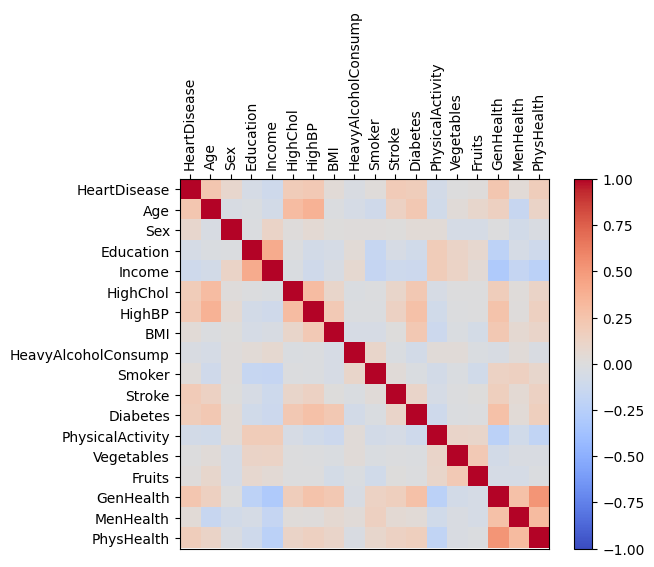

,HeartDisease,Age,Sex,Education,Income,HighChol,HighBP,BMI,HeavyAlcoholConsump,Smoker,Stroke,Diabetes,PhysicalActivity,Vegetables,Fruits,GenHealth,MenHealth,PhysHealth
HeartDisease,1.000000,0.229607,0.084947,-0.061838,-0.106060,0.186037,0.206152,0.036320,-0.038286,0.020145,0.195105,0.172058,-0.071736,-0.007086,0.009968,0.232193,0.037532,0.172922
Age,0.229607,1.000000,-0.041317,-0.030047,-0.072718,0.300146,0.360444,-0.018222,-0.059214,-0.094295,0.140383,0.217921,-0.093445,0.029683,0.089220,0.144580,-0.151428,0.111619
Sex,0.084947,-0.041317,1.000000,-0.020611,0.114492,0.012746,0.050814,0.003942,0.012306,0.010663,0.007144,0.032213,0.036975,-0.057577,-0.057681,-0.006212,-0.084218,-0.038019
Education,-0.061838,-0.030047,-0.020611,1.000000,0.400087,-0.012498,-0.075109,-0.059862,0.031366,-0.158912,-0.051083,-0.086036,0.180337,0.109507,0.070547,-0.213876,-0.060164,-0.105636
Income,-0.106060,-0.072718,0.114492,0.400087,1.000000,-0.029019,-0.101367,-0.044609,0.066779,-0.166727,-0.109869,-0.124534,0.181822,0.119903,0.039937,-0.303718,-0.168562,-0.228096
HighChol,0.186037,0.300146,0.012746,-0.012498,-0.029019,1.000000,0.300159,0.094126,-0.025008,-0.015576,0.098358,0.218521,-0.052013,-0.004058,-0.007554,0.176082,0.021639,0.114603
HighBP,0.206152,0.360444,0.050814,-0.075109,-0.101367,0.300159,1.000000,0.205674,-0.018015,-0.017352,0.134510,0.269407,-0.092789,-0.011803,-0.003887,0.254723,0.014472,0.147257
BMI,0.036320,-0.018222,0.003942,-0.059862,-0.044609,0.094126,0.205674,1.000000,-0.051091,-0.052419,0.007600,0.212403,-0.120161,-0.025162,-0.062540,0.216492,0.059940,0.102264
HeavyAlcoholConsump,-0.038286,-0.059214,0.012306,0.031366,0.066779,-0.025008,-0.018015,-0.051091,1.000000,0.093771,-0.028156,-0.074995,0.029284,0.025495,-0.030981,-0.045539,0.027654,-0.034420
Smoker,0.020145,-0.094295,0.010663,-0.158912,-0.166727,-0.015576,-0.017352,-0.052419,0.093771,1.000000,0.024099,-0.023957,-0.076531,-0.027412,-0.090881,0.129654,0.145651,0.090949


In [7]:
#correlation between variables
corr = brfss.corr(method='pearson')
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
labels = corr.columns
plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.xticks(range(len(corr)), labels, rotation=90)
plt.yticks(range(len(corr)), labels)
plt.show()
corr

In [8]:
#after exploration, these are the features to be dropped
#imbalanced target variable, will fix in the next section
brfss['HeartDisease'].value_counts()
brfss = brfss.drop('Education', axis=1)
brfss = brfss.drop('PhysHealth', axis=1)
brfss = brfss.drop('Fruits', axis=1)
brfss = brfss.drop('Vegetables', axis=1)
brfss = brfss.drop('MenHealth', axis=1)
brfss = brfss.drop('HeavyAlcoholConsump', axis=1)
brfss = brfss.drop('BMI', axis=1)
brfss = brfss.drop('Smoker', axis=1)
brfss = brfss.drop('PhysicalActivity', axis=1)

 ### Handling Imbalanced Classes Using RandomUnderSampling and SMOTE

In [9]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [10]:
#isolate the target variable
X = brfss.drop('HeartDisease', axis=1)
y = brfss['HeartDisease']

In [11]:
#split the dataset, 90-10% between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [12]:
y.value_counts()

HeartDisease
0.0    204278
1.0     22769
Name: count, dtype: int64

In [13]:
#class count for the target variable in the training set before sampling techniques
counter = Counter(y_train)
print(counter)

Counter({0.0: 183854, 1.0: 20488})


In [14]:
#Random undersampler, ratio of 2:3 positive/negative
under = RandomUnderSampler(sampling_strategy=0.7, random_state=101)
X_train, y_train = under.fit_resample(X_train, y_train)

In [15]:
# Chose not to use SMOTE and only used random undersampling, code still provided

# pipeline for balancing -- random undersampling on majority class, smote on minority class
# only performed on the training set
# ratio is 1:1

# over = SMOTE(sampling_strategy=0.5, random_state=101)
# under = RandomUnderSampler(sampling_strategy=1, random_state=101)
# steps = [('over', over), ('under', under)]
# pipeline = Pipeline(steps=steps)
# X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [16]:
#count for target variable after sampling techniques applied
counter = Counter(y_train)
print(counter)

Counter({0.0: 29268, 1.0: 20488})


In [17]:
#count for target variable in the test set
#still imbalanced because we are not balancing test data
counter = Counter(y_test)
print(counter)

Counter({0.0: 20424, 1.0: 2281})


### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import time 

In [19]:
#parameters for Randomized Search Cross Validation for logistic regression
param_log = dict()
param_log['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'saga']
param_log['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param_log['C'] = np.logspace(0, 4, num=10)
param_log

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
 'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
        5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
        3.59381366e+03, 1.00000000e+04])}

In [20]:
#create classifier
logr = LogisticRegression()
#create randomized search, 250 iterations and 5-folds for CV
search_logr = RandomizedSearchCV(logr,
                            param_log,
                            n_iter=250,
                            scoring='accuracy',
                            cv=5,
                            n_jobs=-1,
                            random_state=101)
#fit the search to see which params are good
result_logr = search_logr.fit(X_train, y_train)

In [21]:
print(result_logr.best_score_)
print(result_logr.best_params_)

0.75355742333576
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 2.7825594022071245}


In [22]:
#Create new model with the best params from the randomizedsearch
log_model = LogisticRegression(solver='newton-cg', 
                                penalty = 'l2', 
                                C = 2.7825594022071245)
#evaluate how the model will perform using 10-fold cross validation
kfolds_logr = cross_val_score(log_model,
                         X_train,
                         y_train,
                         cv = 10,
                         scoring='accuracy')
#show the scores, the mean on the kfolds, and the std for logistic regression
#this will tell us how stable the model is 
print(kfolds_logr)
print("the mean is:", kfolds_logr.mean())
print("the std is:", kfolds_logr.std())

[0.75442122 0.74799035 0.75442122 0.74919614 0.7596463  0.75221061
 0.75557789 0.74773869 0.75879397 0.75698492]
the mean is: 0.7536981329476967
the std is: 0.004090290732705805


In [23]:
#fit the model and time it
start_logr = time.time()
log_model.fit(X_train, y_train)
stop_logr = time.time()

In [24]:
#predict on the fitted model
predicted_log = log_model.predict(X_test)

In [25]:
#Confusion Matrix
cm = metrics.confusion_matrix
cm_logr = cm(y_test, predicted_log)
tn, fp, fn, tp= cm_logr.ravel()
print("Confusion Matrix for Logistic Regression:", '\n', cm_logr)
print("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

#Metrics for Logistc Regression
accuracy_logr = accuracy_score(y_test, predicted_log)
precision_logr = precision_score(y_test, predicted_log, pos_label=1.0)
recall_logr = recall_score(y_test, predicted_log, pos_label=1.0)
f1_logr = f1_score(y_test, predicted_log, pos_label=1.0)
print('\n', "Metrics for Logistic Regression:", '\n')
print("Accuracy_LogisticReg:", accuracy_logr)
print("Precision_LogisticReg:", precision_logr)
print("Recall_LogisticReg:", recall_logr)
print("F1 Score_LogisticReg:", f1_logr)

#Classification Report
print('\n', "Classification Report for Logistic Regression:")
print(classification_report(y_test, predicted_log))

#Time to complete the model fitting
print('\n', f"Logistic Regression Training Time: {stop_logr - start_logr}s")

Confusion Matrix for Logistic Regression: 
 [[16449  3975]
 [  745  1536]]
TP:  1536 , FP:  3975 , TN:  16449 , FN: 745

 Metrics for Logistic Regression: 

Accuracy_LogisticReg: 0.7921162739484695
Precision_LogisticReg: 0.27871529667936856
Recall_LogisticReg: 0.6733888645330995
F1 Score_LogisticReg: 0.3942505133470226

 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.87     20424
         1.0       0.28      0.67      0.39      2281

    accuracy                           0.79     22705
   macro avg       0.62      0.74      0.63     22705
weighted avg       0.89      0.79      0.83     22705


 Logistic Regression Training Time: 0.1411592960357666s


### K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#parameters for KNN randomized search
param_knn = dict()
param_knn['n_neighbors'] = range(1, 500)
param_knn['weights'] = ['uniform', 'distance']
param_knn

{'n_neighbors': range(1, 500), 'weights': ['uniform', 'distance']}

In [28]:
#Create the classifier
knn = KNeighborsClassifier()
#Randomized search, 5-fold CV, and 50 interations between 1-500 neighbors
search_knn = RandomizedSearchCV(knn, 
                        param_knn,
                        n_iter=50,
                        cv=5, 
                        scoring='accuracy', 
                        n_jobs=-1, 
                        random_state=101)
#fit the search
result_knn = search_knn.fit(X_train, y_train)

In [29]:
print(result_knn.best_score_)
print(result_knn.best_params_)

0.7440509864897484
{'weights': 'uniform', 'n_neighbors': 366}


In [30]:
#create new model with best params 
knn_model = KNeighborsClassifier(n_neighbors=366, 
                                 weights='uniform')
#evaluate best params KNN model with 10-fold cross validation
kfolds_knn = cross_val_score(knn_model, 
                        X_train, 
                        y_train, 
                        cv=10, 
                        scoring='accuracy')
#scores, mean and std for KNN 
print(kfolds_knn)
print("the mean is:", kfolds_knn.mean())
print("the std is:", kfolds_knn.std())

[0.7465836  0.73593248 0.73593248 0.73834405 0.75080386 0.74457395
 0.7481407  0.73668342 0.75316583 0.74914573]
the mean is: 0.743930609639839
the std is: 0.0062974372850959645


In [31]:
#fit the final model and time it 
start_knn = time.time()
knn_model.fit(X_train, y_train)
stop_knn = time.time()

In [32]:
#predict on the test set with KNN model
predicted_knn = knn_model.predict(X_test)

In [33]:
#Confusion Matrix
cm = metrics.confusion_matrix
cm_knn = cm(y_test, predicted_knn)
tn2, fp2, fn2, tp2 = cm_knn.ravel()
print("Confusion Matrix for K-Nearest Neighbors:", '\n', cm_knn)
print("TP: ", tp2,", FP: ", fp2,", TN: ", tn2,", FN:", fn2)

#Metrics for KNN
accuracy_knn = accuracy_score(y_test, predicted_knn)
precision_knn = precision_score(y_test, predicted_knn, pos_label=1.0)
recall_knn = recall_score(y_test, predicted_knn, pos_label=1.0)
f1_knn = f1_score(y_test, predicted_knn, pos_label=1.0)
print('\n', "Metrics for KNN:", '\n')
print("Accuracy_KNN:", accuracy_knn)
print("Precision_KNN:", precision_knn)
print("Recall_KNN:", recall_knn)
print("F1 Score_KNN:", f1_knn)

#Classification Report
print('\n', "Classification Report:")
print(classification_report(y_test, predicted_knn))

#Time to fit the model
print('\n', f"K-Nearest Neighbors Training Time: {stop_knn - start_knn}s")

Confusion Matrix for K-Nearest Neighbors: 
 [[16411  4013]
 [  804  1477]]
TP:  1477 , FP:  4013 , TN:  16411 , FN: 804

 Metrics for KNN: 

Accuracy_KNN: 0.7878440872054614
Precision_KNN: 0.26903460837887067
Recall_KNN: 0.6475230162209558
F1 Score_KNN: 0.3801312572384507

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87     20424
         1.0       0.27      0.65      0.38      2281

    accuracy                           0.79     22705
   macro avg       0.61      0.73      0.63     22705
weighted avg       0.88      0.79      0.82     22705


 K-Nearest Neighbors Training Time: 0.08133554458618164s


### Support Vector Machines

In [34]:
from sklearn.svm import SVC

In [35]:
# Tried many different combinations of iterarions and folds, but time to complete was too long (45+ mins)
# Most likely due to a SVM not being very good with large datasets
# Manually tried parameter tuning to find a good one 
# Code for RandomizedSearch still included 

# Parameters for SVM randomized search
# param_svm = dict()
# param_svm['C'] = [0.01, 0.1, 1, 10, 100, 1000]
# param_svm['kernel'] = ['linear'] #linear only kernels to save computation time  
# param_svm['gamma'] = ['scale', 'auto']
# param_svm

# #Create new classifier
# svm = SVC()

# #Randomized search with 10 iterations, 5-fold CV 
# search_svm = RandomizedSearchCV(svm, 
#                                 param_svm,
#                                 n_iter=5, 
#                                 cv=3,
#                                 scoring='accuracy',
#                                 n_jobs=-1, 
#                                 random_state=101) 
# #fit SVM search
# result_svm = search_svm.fit(X_train, y_train)

# #best params and scores for SVM
# print(result_svm.best_score_)
# print(result_svm.best_params_)

In [36]:
#create new model with best params 
svm_model = SVC(C=1.0, 
            kernel='rbf', 
            gamma='scale')
#evaluate best params SVM model with 10-fold cross validation
kfolds_svm = cross_val_score(svm_model, 
                        X_train, 
                        y_train, 
                        cv=10, 
                        scoring='accuracy',
                        n_jobs=-1)
#scores, mean and std for SVM
print(kfolds_svm)
print("the mean is:", kfolds_svm.mean())
print("the std is:", kfolds_svm.std())

[0.76004823 0.74799035 0.75221061 0.74919614 0.75803859 0.75422026
 0.75798995 0.75175879 0.76341709 0.76341709]
the mean is: 0.7558287094637175
the std is: 0.005293378156523944


In [37]:
#fit the final model and time it
start_svm = time.time()
svm_model.fit(X_train, y_train)
stop_svm = time.time()

In [38]:
#predict the new SVM model 
predicted_svm = svm_model.predict(X_test)

In [39]:
#Confusion Matrix
cm = metrics.confusion_matrix
cm_svm = cm(y_test, predicted_svm)
tn3, fp3, fn3, tp3 = cm_svm.ravel()
print("Confusion Matrix for Support Vector Machines:", '\n', cm_svm)
print("TP: ", tp3,", FP: ", fp3,", TN: ", tn3,", FN:", fn3)

#Metrics for SVM
accuracy_svm = accuracy_score(y_test, predicted_svm)
precision_svm = precision_score(y_test, predicted_svm, pos_label=1.0)
recall_svm = recall_score(y_test, predicted_svm, pos_label=1.0)
f1_svm = f1_score(y_test, predicted_svm, pos_label=1.0)
print('\n', "Metrics for SVM:", '\n')
print("Accuracy_SVM:", accuracy_svm)
print("Precision_SVM:", precision_svm)
print("Recall_SVM:", recall_svm)
print("F1 Score_SVM:", f1_svm)

#Classification Report
print('\n', "Classification Report:")
print(classification_report(y_test, predicted_svm))

#Time to fit the model
print('\n', f"Support Vector Machines Training Time: {stop_svm - start_svm}s")

Confusion Matrix for Support Vector Machines: 
 [[16125  4299]
 [  687  1594]]
TP:  1594 , FP:  4299 , TN:  16125 , FN: 687

 Metrics for SVM: 

Accuracy_SVM: 0.7804007927769214
Precision_SVM: 0.2704904123536399
Recall_SVM: 0.698816308636563
F1 Score_SVM: 0.3900171274773673

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     20424
         1.0       0.27      0.70      0.39      2281

    accuracy                           0.78     22705
   macro avg       0.61      0.74      0.63     22705
weighted avg       0.89      0.78      0.82     22705


 Support Vector Machines Training Time: 40.5010507106781s


### Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Parameters for Random Forest search
param_rf = dict()
param_rf['bootstrap'] = [True, False]
param_rf['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
param_rf['max_features'] = ['auto', 'sqrt']
param_rf['min_samples_leaf'] = [1, 2, 4]
param_rf['min_samples_split'] = [2, 5, 10]
param_rf['n_estimators'] =  [10, 50, 100, 200, 400, 600, 800, 1000]
param_rf

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000]}

In [42]:
#Create new classifier for RF
rf = RandomForestClassifier()
#Randomized search with 75 iterations, 5-fold CV 
search_rf = RandomizedSearchCV(rf, 
                                param_rf,
                                n_iter=75, 
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1, 
                                random_state=101) 
#fit Random Forest search
result_rf = search_rf.fit(X_train, y_train)

In [43]:
#best params for Random Forests
print(result_rf.best_score_)
print(result_rf.best_params_)

0.7548637116081015
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [44]:
#create new RF model with best params 
rf_model = RandomForestClassifier(n_estimators = 400, 
                                  min_samples_split = 10, 
                                  min_samples_leaf = 2, 
                                  max_features = 'sqrt', 
                                  max_depth = 10, 
                                  bootstrap = False)
#evaluate best params RF model with 10-fold cross validation
kfolds_rf = cross_val_score(rf_model, 
                        X_train, 
                        y_train, 
                        cv=10, 
                        scoring='accuracy',
                        n_jobs=-1)
#scores, mean and std for RF
print(kfolds_rf)
print("the mean is:", kfolds_rf.mean())
print("the std is:", kfolds_rf.std())

[0.75602894 0.75261254 0.75080386 0.74979904 0.75924437 0.75663183
 0.75577889 0.75075377 0.76201005 0.75738693]
the mean is: 0.7551050227019341
the std is: 0.003813908965483143


In [45]:
#fit the model and time it 
start_rf = time.time()
rf_model.fit(X_train, y_train)
stop_rf = time.time()

In [46]:
#predict on the RF model
predicted_rf = rf_model.predict(X_test)

In [47]:
#Confusion Matrix
cm = metrics.confusion_matrix
cm_rf = cm(y_test, predicted_rf)
tn4, fp4, fn4, tp4 = cm_rf.ravel()
print("Confusion Matrix for Random Forest Classifier:", '\n', cm_rf)
print("TP: ", tp4,", FP: ", fp4,", TN: ", tn4,", FN:", fn4)

#Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, predicted_rf)
precision_rf = precision_score(y_test, predicted_rf, pos_label=1.0)
recall_rf = recall_score(y_test, predicted_rf, pos_label=1.0)
f1_rf = f1_score(y_test, predicted_rf, pos_label=1.0)
print('\n', "Metrics for Random Forests:", '\n')
print("Accuracy_RF:", accuracy_rf)
print("Precision_RF:", precision_rf)
print("Recall_RF:", recall_rf)
print("F1 Score_RF:", f1_rf)

#Classification Report
print('\n', "Classification Report:")
print(classification_report(y_test, predicted_rf))

#Time it took to fit the model
print('\n', f" Random Forests Training Time: {stop_rf - start_rf}s")

Confusion Matrix for Random Forest Classifier: 
 [[16201  4223]
 [  679  1602]]
TP:  1602 , FP:  4223 , TN:  16201 , FN: 679

 Metrics for Random Forests: 

Accuracy_RF: 0.7841004184100419
Precision_RF: 0.2750214592274678
Recall_RF: 0.7023235423060061
F1 Score_RF: 0.39526276831976315

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     20424
         1.0       0.28      0.70      0.40      2281

    accuracy                           0.78     22705
   macro avg       0.62      0.75      0.63     22705
weighted avg       0.89      0.78      0.82     22705


  Random Forests Training Time: 7.285680770874023s


### XGBoost

In [48]:
from xgboost import XGBClassifier

In [49]:
#Parameters for XGBoost
param_xgb = dict()
param_xgb['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1]
param_xgb['max_depth'] = range(3, 21, 3)
param_xgb['gamma'] = [0.0, 0.1, 0.2, 0.3, 0.4]
param_xgb['reg_alpha'] =[0.001, 0.01, 0.1, 1, 10, 100]
param_xgb['reg_lambda'] = [0.001, 0.01, 0.1, 1, 10, 100]
param_xgb['colsample_bytree'] = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_xgb

{'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
 'max_depth': range(3, 21, 3),
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100],
 'reg_lambda': [0.001, 0.01, 0.1, 1, 10, 100],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [50]:
#Create new classifier for XGBoost and set random state
xgb = XGBClassifier(random_state=101)
#Randomized search with 250 iterations, 5-fold CV 
search_xgb = RandomizedSearchCV(xgb, 
                                param_xgb,
                                n_iter=250, 
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1, 
                                random_state=101) 
#fit XGBoost search
result_xgb = search_xgb.fit(X_train, y_train)

In [51]:
#best params for XGBoost
print(result_xgb.best_score_)
print(result_xgb.best_params_)

0.7570745386315777
{'reg_lambda': 0.01, 'reg_alpha': 0.01, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.9}


In [52]:
#create new boosted model with best params 
xgb_model = XGBClassifier(reg_lambda=0.01, 
                          reg_alpha=0.01, 
                          max_depth=3, 
                          learning_rate=0.1, 
                          gamma=0.4, 
                          colsample_bytree=0.9)
#evaluate best params for boosted model with 10-fold cross validation
kfolds_xgb = cross_val_score(xgb_model, 
                        X_train, 
                        y_train, 
                        cv=10, 
                        scoring='accuracy',
                        n_jobs=-1)
#scores, mean and std for boosted model
print(kfolds_xgb)
print("the mean is:", kfolds_xgb.mean())
print("the std is:", kfolds_xgb.std())

[0.75904341 0.75180868 0.75361736 0.75221061 0.76145498 0.75602894
 0.76301508 0.74854271 0.76241206 0.75718593]
the mean is: 0.7565319766032735
the std is: 0.0047025201394785


In [53]:
#fit the model and time it 
start_xgb = time.time()
xgb_model.fit(X_train, y_train)
stop_xgb = time.time()

In [54]:
#predict on the XGBoost model
predicted_xgb = xgb_model.predict(X_test)

In [55]:
#Confusion Matrix
cm = metrics.confusion_matrix
cm_xgb = cm(y_test, predicted_xgb)
tn5, fp5, fn5, tp5 = cm_xgb.ravel()
print("Confusion Matrix for XGBoost:", '\n', cm_xgb)
print("TP: ", tp5,", FP: ", fp5,", TN: ", tn5,", FN:", fn5)

#Metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, predicted_xgb)
precision_xgb = precision_score(y_test, predicted_xgb, pos_label=1.0)
recall_xgb = recall_score(y_test, predicted_xgb, pos_label=1.0)
f1_xgb = f1_score(y_test, predicted_xgb, pos_label=1.0)
print('\n', "Metrics for XGBoosts:", '\n')
print("Accuracy_XGB:", accuracy_xgb)
print("Precision_XGB:", precision_xgb)
print("Recall_XGB:", recall_xgb)
print("F1 Score_XGB:", f1_xgb)

#Classification Report
print('\n', "Classification Report:")
print(classification_report(y_test, predicted_xgb))

#Time it took to fit the model
print('\n', f" XGBoost Training Time: {stop_xgb - start_xgb}s")

Confusion Matrix for XGBoost: 
 [[16061  4363]
 [  656  1625]]
TP:  1625 , FP:  4363 , TN:  16061 , FN: 656

 Metrics for XGBoosts: 

Accuracy_XGB: 0.7789473684210526
Precision_XGB: 0.271376085504342
Recall_XGB: 0.7124068391056554
F1 Score_XGB: 0.39303422421090817

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.86     20424
         1.0       0.27      0.71      0.39      2281

    accuracy                           0.78     22705
   macro avg       0.62      0.75      0.63     22705
weighted avg       0.89      0.78      0.82     22705


  XGBoost Training Time: 0.10937857627868652s


### Feature Importance

In [56]:
#important features for the Random Forest and XGBoost models 
rf_feat = rf_model.feature_importances_
xgb_feat = xgb_model.feature_importances_

In [57]:
#making dataframes for the important features for both models
imp_feat_rf = pd.DataFrame(index=X.columns,
                           data=rf_feat, 
                           columns=['Importance'])
imp_feat_xgb = pd.DataFrame(index=X.columns,
                            data=xgb_feat, 
                            columns=['Importance'])

In [58]:
#Sorting the importance of each feature highest to lowest 
print('Random Forest Importance:', '\n', imp_feat_rf.sort_values('Importance', ascending=False))
print('\n', 'XGBoost Importance:', '\n', imp_feat_xgb.sort_values('Importance', ascending=False))

Random Forest Importance: 
            Importance
Age          0.299219
GenHealth    0.215097
HighBP       0.151782
HighChol     0.112460
Stroke       0.077621
Sex          0.056427
Diabetes     0.049925
Income       0.037468

 XGBoost Importance: 
            Importance
HighBP       0.385554
Age          0.153019
HighChol     0.152115
GenHealth    0.130819
Stroke       0.067331
Sex          0.058328
Diabetes     0.042573
Income       0.010261


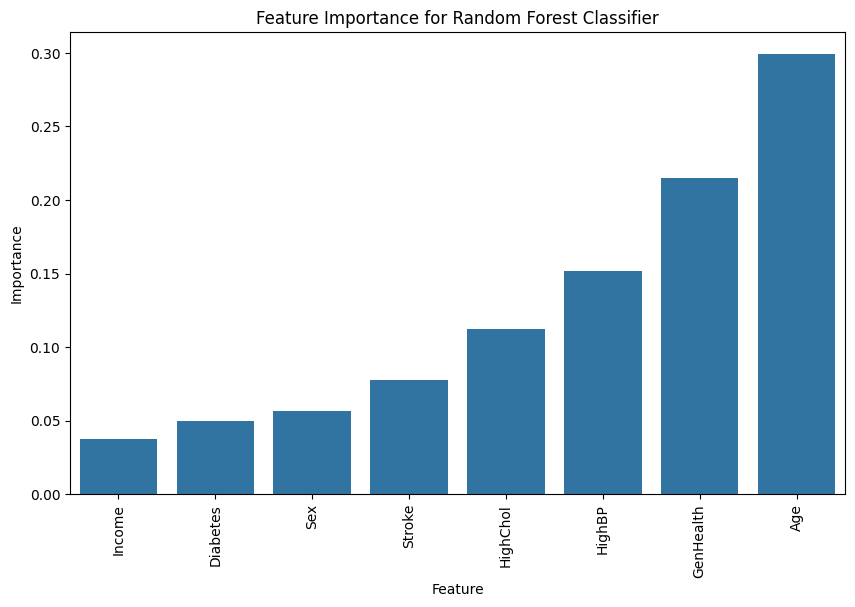

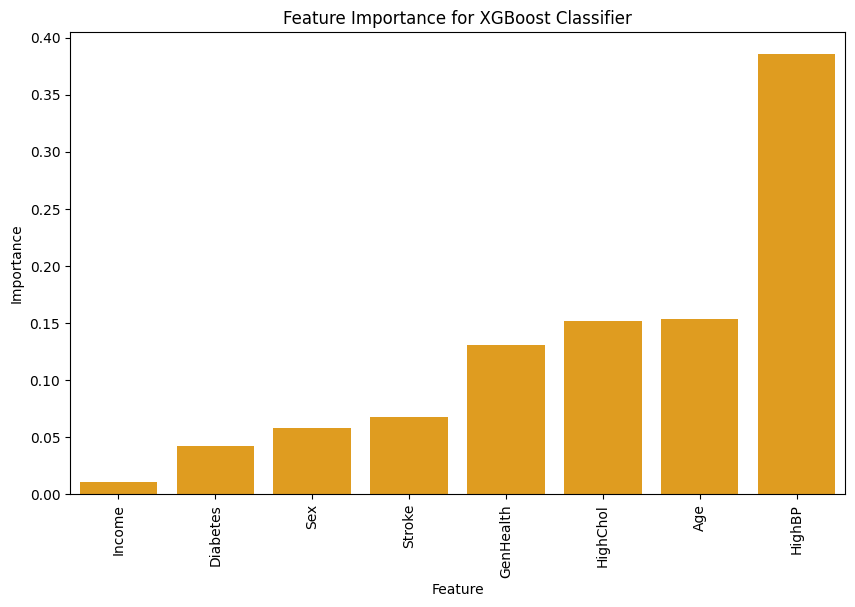

In [59]:
#Plotting the feature importance for random forest, x=feature, y=importance
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=imp_feat_rf.sort_values('Importance'),
            x=imp_feat_rf.sort_values('Importance').index,
            y='Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.xlabel('Feature')
plt.ylabel('Importance') 
plt.xticks(rotation=90)
plt.show()

#Plotting the feautre importance for XGBoost, x=feature, y=importance
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=imp_feat_xgb.sort_values('Importance'),
            x=imp_feat_xgb.sort_values('Importance').index,
            y='Importance',
            color='orange')
plt.title('Feature Importance for XGBoost Classifier')
plt.xlabel('Feature')
plt.ylabel('Importance') 
plt.xticks(rotation=90)
plt.show()

The Feature importance for both random forests and XGBoost were quite similar, with the top 4 and bottom 4 being the same across both models. High BP, General Health, and Age and High Cholestrol seem to be the most important factors in classification of heart disease. Diabetes, Stroke and Sex also play a role to some degree but not as much as the aforementioned features. Income seems to have least affect on determining and classifying heart disease.

In a clinical setting, with some form of health expert or researcher surveying patients or individuals, the most most important features to focus on the in the dataset would be Age, followed closely by High Blood Pressure and High Cholesterol. General health should also have a significant impact in screening. Sex, previous history of stroke and diabetes should also be important factors to consider. Income, in our opinion is not as important as the other features selected. 


### Model Comparisons

In [64]:
#Table comparing the various models and their metrics
from tabulate import tabulate
model_comparison = [['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fit Time'], 
         ['Logistic Regression', accuracy_logr, precision_logr, recall_logr, f1_logr, {stop_logr - start_logr}], 
         ['K-Nearest Neighbors', accuracy_knn, precision_knn, recall_knn, f1_knn, {stop_knn - start_knn}], 
         ['Support Vector Classifier', accuracy_svm, precision_svm, recall_svm, f1_svm, {stop_svm - start_svm}],
         ['Random Forest Classifier', accuracy_rf, precision_rf, recall_rf, f1_rf, {stop_rf - start_rf}],
         ['XGBoost', accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, {stop_xgb - start_xgb}]]
print(tabulate(model_comparison, headers='firstrow'))

Model                        Accuracy    Precision    Recall    F1 Score  Fit Time
-------------------------  ----------  -----------  --------  ----------  ---------------------
Logistic Regression          0.792116     0.278715  0.673389    0.394251  {0.1411592960357666}
K-Nearest Neighbors          0.787844     0.269035  0.647523    0.380131  {0.08133554458618164}
Support Vector Classifier    0.780401     0.27049   0.698816    0.390017  {40.5010507106781}
Random Forest Classifier     0.7841       0.275021  0.702324    0.395263  {7.285680770874023}
XGBoost                      0.778947     0.271376  0.712407    0.393034  {0.10937857627868652}


Almost all of the models were very similar in performance metrics, excluding fit times which differed between the various algorithms. The highest accuracy was logisitic regression, with the lowest being XGBoost. Both logisitic regression and XGBoost however had almost identical f1-scores, with logistic regression being slightly better. However, the recall for logistic regression was lower than XGBoost, and since we are dealing with healthcare data where the recall is an important metric, the XGBoost is preferred compared to logistic regression. The fit-times were also different, with XGBoost performing quicker than logistic regression.

In terms of fit time, SVM was the worst performing model with extremely long fit times. This is most likely due to SVM being computationaly complex and the dataset being large, even after undersampling. The quickest model was K-Nearest neighbors, but it also had the lowest f1- score of all the models, and the only f1-score less than 0.39. Random forest classifier was the second longest fit time, but no where near as long as SVM. It also happened to have the best f1-score out of all the models, and average accuracy at 78.41%. 

Overall, taking into account the accuracy, the f1-score, the trade off between precision/recall (recall is slightly more important for this specific dataset), and the fit times. The preferred model would be XGBoost. It was the second quickest model to fit at 0.11s, and had a high f1 score at 0.393. The recall was also the highest of all the models at 0.71. The accuracy, despite being the lowest was still good at 77.9%. However, if model fit times are not a problem and the infrastructure to run complex algorithms is avaiable, than the preferred model would have to be random forest classifier, with high recall, f1-score, and accuracy.  

### Conclusion

In conclusion, in the technical aspect, the preferred model for this specific data and problem would have to XGBoost. However, if the fit time is not a large problem, than random forest classifier would be preffered as it does perform slightly better than XGBoost overall.

In the clinical aspect, the most important features and concerns that healthcare experts should be looking out for in patients regarding heart disease are: Age of the patient (the older the more at risk), whether they have high blood pressure or cholesterol, and whether their general health is good or not. Sex and previous history of stroke and diabetes may also be important factors to consider. 